In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import os
print(os.getcwd())


/Users/apple/Downloads


In [32]:
# Load the appointments and revenues tables
appointments = pd.read_csv('/Users/apple/downloads/clean_test_appointments.csv')
revenues = pd.read_csv('/Users/apple/downloads/clean_test_revenues.csv')


In [52]:
# Extract year and month from the appointment_date
appointments['appointment_year'] = pd.DatetimeIndex(appointments['appointment_date']).year
appointments['appointment_month'] = pd.DatetimeIndex(appointments['appointment_date']).month


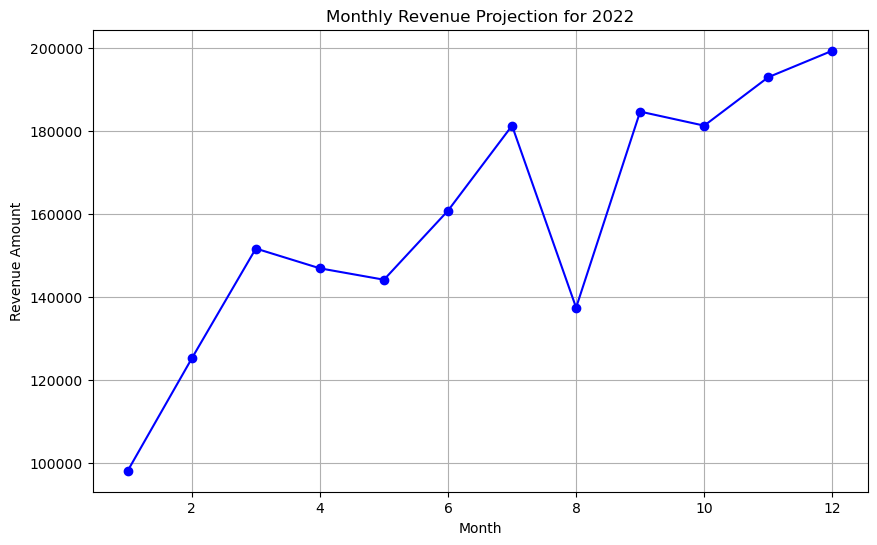

In [56]:
#The plot helps visually identify any recurring patterns or trends in monthly revenue throughout 2022.
# Calculate monthly revenue for 2022
# Extract month and year
merged_df['appointment_month'] = merged_df['appointment_date'].dt.month
merged_df['appointment_year'] = merged_df['appointment_date'].dt.year

monthly_revenue_2022 = merged_df[merged_df['appointment_year'] == 2022].groupby(['appointment_year', 'appointment_month'])['revenues'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue_2022['appointment_month'], monthly_revenue_2022['revenues'], marker='o', linestyle='-', color='b')
plt.title('Monthly Revenue Projection for 2022')
plt.xlabel('Month')
plt.ylabel('Revenue Amount')
plt.grid(True)
plt.show()

In [ ]:
# The visual representation offered a concise summary of the variations in monthly revenue. 
# We observed a consistent upward trajectory in the initial half of the year, 
# followed by a decline around August. However, throughout the remainder of the year, the revenue reached its highest point.

<Figure size 1200x600 with 0 Axes>

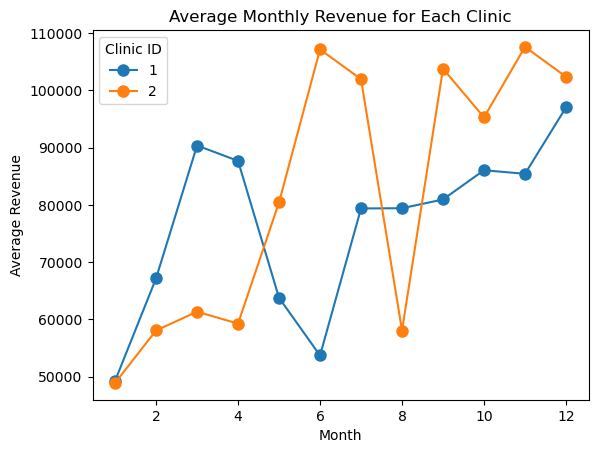

In [26]:
#if we want to consider opening clinic we opening clinic in the coming year 
# then we have to visualize the performance of our already existing clinics
# to help us better understand what we might hope for in 2023

# let's Calculate total revenue per clinic on a monthly basis
monthly_revenue_per_clinic = merged_data.groupby(['appointment_year', 'appointment_month', 'clinic_id'])['revenues'].sum().reset_index()

# Calculate average revenue per clinic on a monthly basis
average_revenue_per_clinic = monthly_revenue_per_clinic.groupby(['clinic_id', 'appointment_month'])['revenues'].mean().reset_index()

# Pivot the data for visualization
average_revenue_pivot = average_revenue_per_clinic.pivot(index='appointment_month', columns='clinic_id', values='revenues')

# Plot the average revenue trends for each clinic
plt.figure(figsize=(12, 6))
average_revenue_pivot.plot(marker='o', linestyle='-', markersize=8)
plt.title('Average Monthly Revenue for Each Clinic')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.legend(title='Clinic ID')
plt.show()

In [ ]:
# Clinic 2 unmistakably demonstrates a higher revenue generation, yet a comprehensive evaluation entails considering various factors pivotal for the success of a new clinic venture in 2023. 
# Key considerations encompass strategic locations, targeted marketing initiatives, and fostering repeated engagements with unique patients. 
# Drawing insights from this seasonal trends, we can strategically formulate plans that not only capitalize on existing strengths but also navigate potential challenges, 
# ultimately paving the way for enhanced revenue generation in the upcoming year.

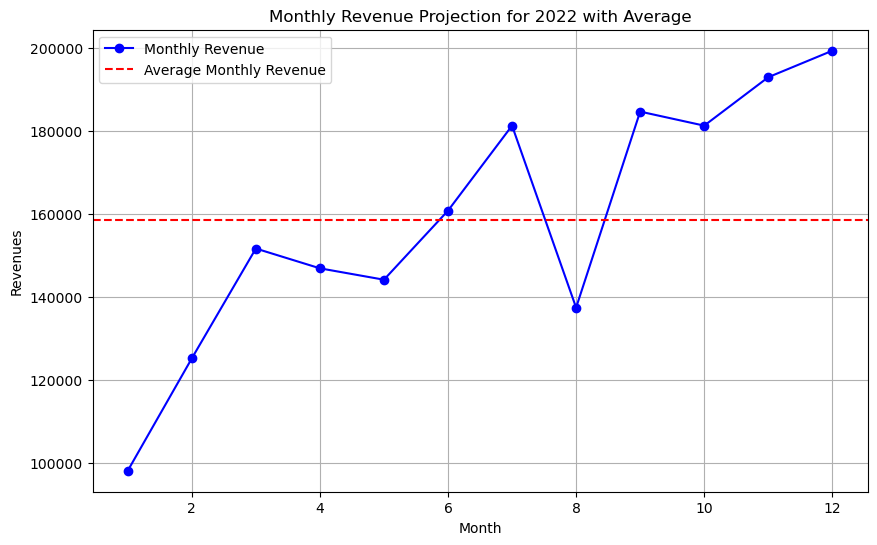

Average Monthly Revenue: 158689.50916666666


In [58]:
# The average monthly revenue serves as a baseline 
#that can be used to estimate the expected revenue from the new clinics in March and July 2023.
# Assuming that the new clinics will contribute similarly to the existing ones, 
#you can use the average as a starting point for these months.


# Filter data for the year 2022
revenue_2022 = merged_df[merged_df['appointment_year'] == 2022]

# Calculate monthly revenue for 2022
monthly_revenue_2022 = revenue_2022.groupby(['appointment_year', 'appointment_month']).agg({'revenues': 'sum'}).reset_index()

# Calculate the average monthly revenue
average_monthly_revenue = monthly_revenue_2022['revenues'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue_2022['appointment_month'], monthly_revenue_2022['revenues'], marker='o', linestyle='-', color='b', label='Monthly Revenue')
plt.axhline(average_monthly_revenue, color='r', linestyle='--', label='Average Monthly Revenue')
plt.title('Monthly Revenue Projection for 2022 with Average')
plt.xlabel('Month')
plt.ylabel('Revenues')
plt.legend()
plt.grid(True)
plt.show()

# Display the average monthly revenue
print(f"Average Monthly Revenue: {average_monthly_revenue}")

In [ ]:
# The average monthly revenue is like a crystal ball that helps us predict how much money we might make. 
# Now, when we bring in the new clinics, we can tweak our predictions by thinking about things like how many new patients we'll have, what services we'll offer, 
# and any cool marketing we're doing for the clinic openings. This way, our predictions get even more accurate.

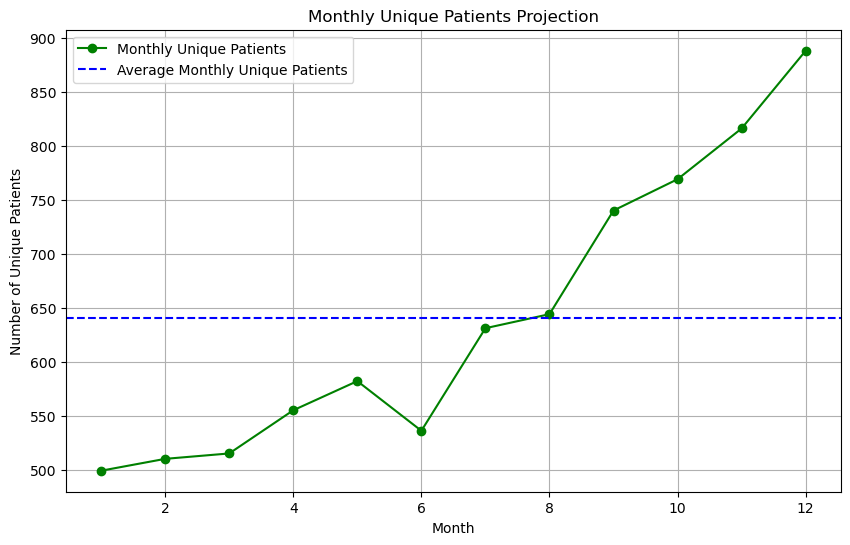

Average Monthly Unique Patients: 640.4166666666666


In [60]:
# now lets calculate the average number of uniques patients the idea of showing this is to create a trendline for predictition. 
# The average monthly unique patients serve as a baseline for estimating the expected number of unique patients for the new clinics in March and July 2023. 
# This baseline provides a reasonable starting point.

# Calculate monthly unique patients
monthly_unique_patients = appointments.groupby(['appointment_year', 'appointment_month'])['patient_id'].nunique().reset_index()

# Calculate the average monthly unique patients
average_monthly_unique_patients = monthly_unique_patients['patient_id'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_unique_patients['appointment_month'], monthly_unique_patients['patient_id'], marker='o', linestyle='-', color='g', label='Monthly Unique Patients')
plt.axhline(average_monthly_unique_patients, color='b', linestyle='--', label='Average Monthly Unique Patients')
plt.title('Monthly Unique Patients Projection')
plt.xlabel('Month')
plt.ylabel('Number of Unique Patients')
plt.legend()
plt.grid(True)
plt.show()

# Display the average monthly unique patients
print(f"Average Monthly Unique Patients: {average_monthly_unique_patients}")


In [ ]:
#Based on the average data for both revenue and unique patients in 2022, 
# we saw that, on average, we made around $158,690 each month and had about 640 unique patients. 
# Now, with the exciting addition of two new clinics in 2023, we can reasonably expect an increase in both revenue and patient numbers. 
# Of course, how much they'll increase exactly depends on several factors like how big the new clinics are, where they're located, 
# the marketing strategies we use, and the local demand for our services.

